In [1]:
import numpy as np
import pandas as pd

In [2]:
Data = np.loadtxt(open("Lab4PokerData.txt", "rb"), delimiter=";", skiprows=1, dtype='str')
#loading the data in the form of string

In [3]:
Data

array(['1 , flush K 320 , TwoPairs A 120 , Raise 5 Raise 10 , Raise 20 Raise 77 , Call 77 ',
       '2 , HighCard A 230 , straight 6 357 , Raise 5 Raise 10 , Raise 20 Call 20 , ',
       '3 , HighCard 4 173 , flush A 374 , Raise 5 Raise 10 , Raise 87 Call 87 , ',
       '4 , fullhouse T 447 , TwoPairs A 195 , Raise 5 Raise 10 , Raise 20 Raise 40 , Call 40 ',
       '5 , OnePair 9 486 , TwoPairs J 220 , Raise 5 Raise 10 , Raise 20 Raise 40 , Fold 0 ',
       '6 , OnePair J 216 , straightflush T 495 , Raise 5 Raise 10 , Raise 3 Raise 6 , Fold 0 ',
       '7 , OnePair 9 297 , straightflush A 476 , Raise 5 Raise 10 , Raise 20 Raise 40 , Fold 0 ',
       '8 , HighCard T 109 , TwoPairs K 485 , Raise 5 Raise 10 , Raise 52 AllIn 475 , ',
       '9 , 3ofakind T 242 , TwoPairs Q 156 , Raise 5 Raise 10 , Raise 20 Call 20 , ',
       '10 , TwoPairs T 129 , fullhouse J 427 , Raise 5 Raise 10 , Raise 20 Raise 40 , Call 40 ',
       '11 , HighCard K 330 , HighCard A 123 , Raise 5 Raise 10 , Raise 20 

In [4]:
data1=pd.Series(Data)

In [5]:
d=data1.str.split(' ',expand=True)

In [6]:
d.shape

(199, 31)

In [7]:
d1=d.iloc[:,:22]

In [8]:
d1.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,",",flush,K,320,",",TwoPairs,A,120,",",...,Raise,10,",",Raise,20,Raise,77,",",Call,77
1,2,",",HighCard,A,230,",",straight,6,357,",",...,Raise,10,",",Raise,20,Call,20,",",,None
2,3,",",HighCard,4,173,",",flush,A,374,",",...,Raise,10,",",Raise,87,Call,87,",",,None
3,4,",",fullhouse,T,447,",",TwoPairs,A,195,",",...,Raise,10,",",Raise,20,Raise,40,",",Call,40
4,5,",",OnePair,9,486,",",TwoPairs,J,220,",",...,Raise,10,",",Raise,20,Raise,40,",",Fold,0


In [9]:
d1=d1.iloc[:,2:]

In [10]:
#d1['ag amount by p1']=d.loc[13]

In [11]:
d1=d1.drop([5,9,14,19,10,12,15,17,21],axis=1)

In [12]:
d1.head()

,2,3,4,6,7,8,11,13,16,18,20
0,flush,K,320,TwoPairs,A,120,5,10,20,77,Call
1,HighCard,A,230,straight,6,357,5,10,20,20,
2,HighCard,4,173,flush,A,374,5,10,87,87,
3,fullhouse,T,447,TwoPairs,A,195,5,10,20,40,Call
4,OnePair,9,486,TwoPairs,J,220,5,10,20,40,Fold


In [13]:
d1.head()

,2,3,4,6,7,8,11,13,16,18,20
0,flush,K,320,TwoPairs,A,120,5,10,20,77,Call
1,HighCard,A,230,straight,6,357,5,10,20,20,
2,HighCard,4,173,flush,A,374,5,10,87,87,
3,fullhouse,T,447,TwoPairs,A,195,5,10,20,40,Call
4,OnePair,9,486,TwoPairs,J,220,5,10,20,40,Fold


In [14]:
d1.iloc[:,-1].value_counts()

         127
Fold      34
Call      23
Raise      9
AllIn      6
Name: 20, dtype: int64

In [15]:
d1.head()

,2,3,4,6,7,8,11,13,16,18,20
0,flush,K,320,TwoPairs,A,120,5,10,20,77,Call
1,HighCard,A,230,straight,6,357,5,10,20,20,
2,HighCard,4,173,flush,A,374,5,10,87,87,
3,fullhouse,T,447,TwoPairs,A,195,5,10,20,40,Call
4,OnePair,9,486,TwoPairs,J,220,5,10,20,40,Fold


In [16]:
RANK_CLASS_COURSE = {
    "straightflush": 1,
    "4ofakind": 2,
    "fullhouse": 3,
    "flush": 4,
    "straight": 5,
    "3ofakind": 6,
    "TwoPairs": 7,
    "OnePair": 8,
    "HighCard": 9
}


In [17]:
type(d1.iloc[1,-1])

str

In [18]:
d1.iloc[1,-1]

''

In [19]:
v=[]

count1=0
for i in range(0,d1.shape[0]):
    if(d1.iloc[i,-1]!=''):
        count1+=1
        v.append(i)


In [20]:
d2=d1.iloc[v,:]

In [21]:
d2

,2,3,4,6,7,8,11,13,16,18,20
0,flush,K,320,TwoPairs,A,120,5,10,20,77,Call
3,fullhouse,T,447,TwoPairs,A,195,5,10,20,40,Call
4,OnePair,9,486,TwoPairs,J,220,5,10,20,40,Fold
5,OnePair,J,216,straightflush,T,495,5,10,3,6,Fold
6,OnePair,9,297,straightflush,A,476,5,10,20,40,Fold
...,...,...,...,...,...,...,...,...,...,...,...
190,HighCard,Q,245,4ofakind,Q,434,5,10,20,40,Fold
192,fullhouse,3,430,TwoPairs,J,214,5,10,20,40,Call
193,TwoPairs,K,169,straight,4,490,5,10,20,40,AllIn
195,HighCard,A,243,4ofakind,K,474,5,10,20,40,Fold


In [22]:
d2.iloc[:,-1].value_counts()

Fold     34
Call     23
Raise     9
AllIn     6
Name: 20, dtype: int64

In [23]:
#d2.columns={'p1_rank','p1_strength','p1_coins','p2_rank','p2_strength','p2_coins','p1_action','p2_action','p1_action1','p2_action1','p2_action2'}

In [24]:
d2

,2,3,4,6,7,8,11,13,16,18,20
0,flush,K,320,TwoPairs,A,120,5,10,20,77,Call
3,fullhouse,T,447,TwoPairs,A,195,5,10,20,40,Call
4,OnePair,9,486,TwoPairs,J,220,5,10,20,40,Fold
5,OnePair,J,216,straightflush,T,495,5,10,3,6,Fold
6,OnePair,9,297,straightflush,A,476,5,10,20,40,Fold
...,...,...,...,...,...,...,...,...,...,...,...
190,HighCard,Q,245,4ofakind,Q,434,5,10,20,40,Fold
192,fullhouse,3,430,TwoPairs,J,214,5,10,20,40,Call
193,TwoPairs,K,169,straight,4,490,5,10,20,40,AllIn
195,HighCard,A,243,4ofakind,K,474,5,10,20,40,Fold


In [25]:
RANK_CLASS_COURSE[d2.iloc[0,0]]

4

In [26]:
rank= {'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'T':10,'J':11,'Q':12,'K':13,'A':14}
cv={'Fold':0,'Call':1,'Raise':2,'AllIn':3}

In [27]:
for i in range(d2.shape[0]):
    v=d2.iloc[i,0]
    v1=d2.iloc[i,3]
    d2.iloc[i,0]=RANK_CLASS_COURSE[v]
    d2.iloc[i,3]=RANK_CLASS_COURSE[v1]
    v2=d2.iloc[i,1]
    d2.iloc[i,1]=rank[v2]
    v3=d2.iloc[i,-1]
    d2.iloc[i,-1]=cv[v3]
    v4=d2.iloc[i,4]
    d2.iloc[i,4]=rank[v4]

    

E:\anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
E:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\anaconda\lib\site-packages\ipykernel_launcher.p

In [28]:
d2=d2.astype('int')

In [29]:
d2.head()

,2,3,4,6,7,8,11,13,16,18,20
0,4,13,320,7,14,120,5,10,20,77,1
3,3,10,447,7,14,195,5,10,20,40,1
4,8,9,486,7,11,220,5,10,20,40,0
5,8,11,216,1,10,495,5,10,3,6,0
6,8,9,297,1,14,476,5,10,20,40,0


In [30]:
d2['p1_avg']=d1.iloc[:,6].add(d1.iloc[:,8])
d2['p2_avg']=d1.iloc[:,7].add(d1.iloc[:,9])

In [31]:
d2.head()

,2,3,4,6,7,8,11,13,16,18,20,p1_avg,p2_avg
0,4,13,320,7,14,120,5,10,20,77,1,520,1077
3,3,10,447,7,14,195,5,10,20,40,1,520,1040
4,8,9,486,7,11,220,5,10,20,40,0,520,1040
5,8,11,216,1,10,495,5,10,3,6,0,53,106
6,8,9,297,1,14,476,5,10,20,40,0,520,1040


In [32]:
d2=d2.drop(['p1_avg','p2_avg'],axis=1)

In [33]:
d2.head()

,2,3,4,6,7,8,11,13,16,18,20
0,4,13,320,7,14,120,5,10,20,77,1
3,3,10,447,7,14,195,5,10,20,40,1
4,8,9,486,7,11,220,5,10,20,40,0
5,8,11,216,1,10,495,5,10,3,6,0
6,8,9,297,1,14,476,5,10,20,40,0


In [34]:
x=d2.iloc[:,:-1]
y=d2.iloc[:,-1]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred=lr.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [41]:
cm=confusion_matrix(y_pred,y_test)

In [42]:
cm

array([[8, 1, 0],
       [0, 5, 0],
       [1, 0, 0]], dtype=int64)

In [43]:
print('logistics regression accuracy:',accuracy_score(y_test,y_pred))

logistics regression accuracy: 0.8666666666666667


### Gaussian navie_bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
gn=GaussianNB()
gn.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
y_pred1=gn.predict(x_test)

In [47]:
cm1=confusion_matrix(y_pred1,y_test)

In [48]:
cm1

array([[0, 0, 0],
       [2, 5, 0],
       [7, 1, 0]], dtype=int64)

In [49]:
print("accuracy score of Gaussian navie bayes:",accuracy_score(y_pred1,y_test))

accuracy score of Gaussian navie bayes: 0.3333333333333333


### knn

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [60]:
y_pred2=knn.predict(x_test)

In [61]:
cm2=confusion_matrix(y_pred2,y_test)

In [62]:
cm2

array([[6, 1, 0],
       [2, 5, 0],
       [1, 0, 0]], dtype=int64)

In [63]:
print("accuracy of knn:",accuracy_score(y_test,y_pred2))

accuracy of knn: 0.7333333333333333


###  Parameter tuning

In [56]:
from sklearn import metrics
scores={}
score_list=[]
k_range=range(1,30)

for k in k_range:
    knn1=KNeighborsClassifier(n_neighbors=k)
    knn1.fit(x_train,y_train)
    y_pred_knn=knn1.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred_knn)
    score_list.append(metrics.accuracy_score(y_test,y_pred_knn))

Text(0, 0.5, 'testing accuracy')

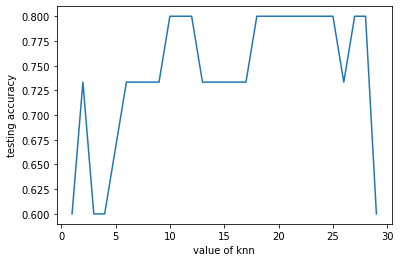

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,score_list)
plt.xlabel("value of knn")
plt.ylabel("testing accuracy")

In [58]:
print('logistics regression accuracy:',accuracy_score(y_test,y_pred))
print("accuracy of knn:",accuracy_score(y_test,y_pred2))
print("accuracy score of Gaussian navie bayes:",accuracy_score(y_pred1,y_test))

logistics regression accuracy: 0.8666666666666667
accuracy of knn: 0.6666666666666666
accuracy score of Gaussian navie bayes: 0.3333333333333333
